In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn  import metrics,linear_model
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('predictive_maintenance.csv')

In [3]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
df.shape

(10000, 10)

In [5]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [6]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [7]:
for i in df.columns:
    print(df[i].sort_values().unique(),'\n',sep='\n')

[    1     2     3 ...  9998  9999 10000]


['H29424' 'H29425' 'H29432' ... 'M24855' 'M24857' 'M24859']


['H' 'L' 'M']


[295.3 295.4 295.5 295.6 295.7 295.8 295.9 296.  296.1 296.2 296.3 296.4
 296.5 296.6 296.7 296.8 296.9 297.  297.1 297.2 297.3 297.4 297.5 297.6
 297.7 297.8 297.9 298.  298.1 298.2 298.3 298.4 298.5 298.6 298.7 298.8
 298.9 299.  299.1 299.2 299.3 299.4 299.5 299.6 299.7 299.8 299.9 300.
 300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9 301.  301.1 301.2
 301.3 301.4 301.5 301.6 301.7 301.8 301.9 302.  302.1 302.2 302.3 302.4
 302.5 302.6 302.7 302.8 302.9 303.  303.1 303.2 303.3 303.4 303.5 303.6
 303.7 303.8 303.9 304.  304.1 304.2 304.3 304.4 304.5]


[305.7 305.8 305.9 306.  306.1 306.2 306.3 306.4 306.5 306.6 306.7 306.8
 306.9 307.  307.1 307.2 307.3 307.4 307.5 307.6 307.7 307.8 307.9 308.
 308.1 308.2 308.3 308.4 308.5 308.6 308.7 308.8 308.9 309.  309.1 309.2
 309.3 309.4 309.5 309.6 309.7 309.8 309.9 310.  310.1 310.2 310.3 310.4
 310.5 310.6 310.7 

In [8]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="O":
        cat.append(i)
    else:
        num.append(i)

In [9]:
cat

['Product ID', 'Type', 'Failure Type']

In [10]:
num

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target']

In [11]:
num.remove('Target')

In [12]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [13]:
for i in cat:
    print(df[i].unique())

['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859']
['M' 'L' 'H']
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


<AxesSubplot:>

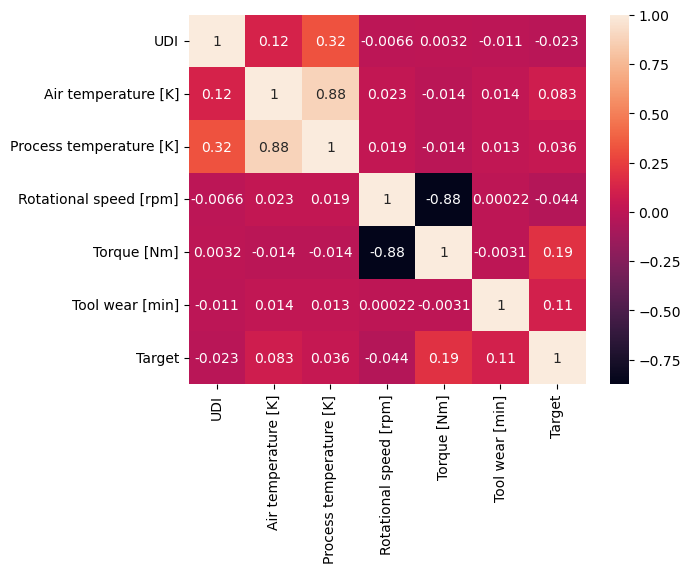

In [14]:
sns.heatmap(df.corr(),annot=True)

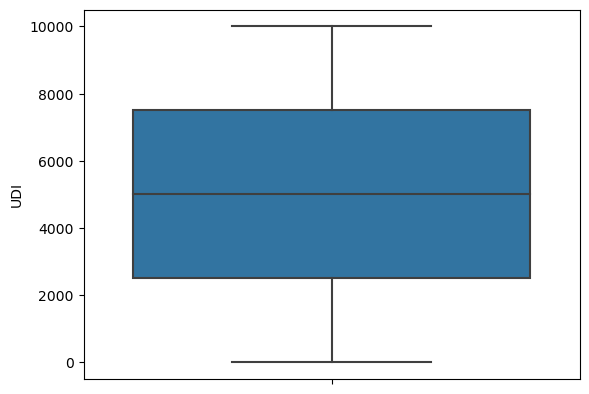

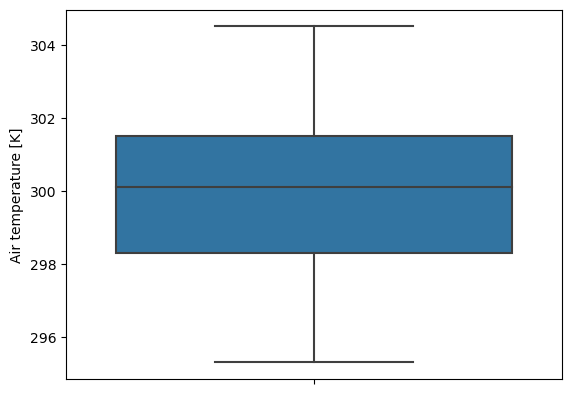

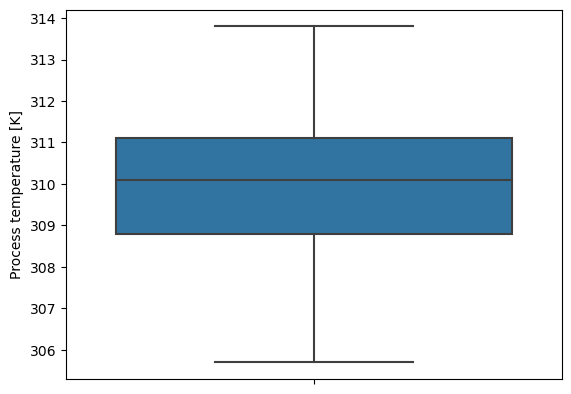

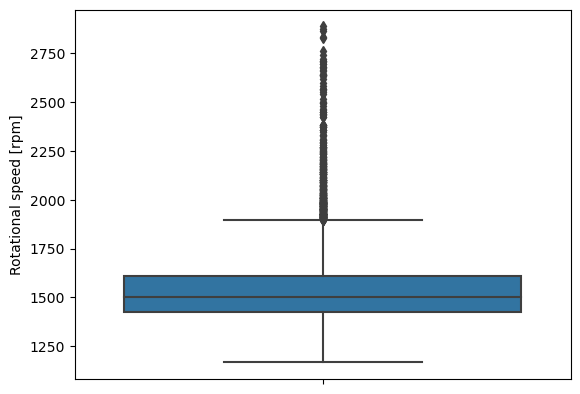

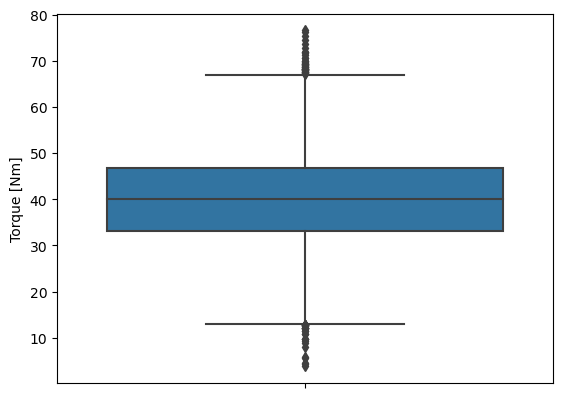

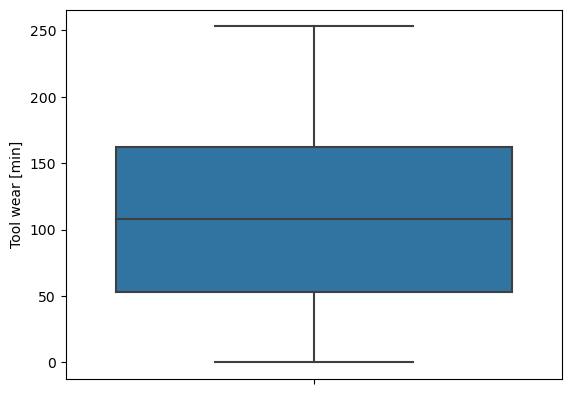

In [15]:
for i in num:
    plt.figure()
    sns.boxplot(y=i,data=df)

In [16]:
col=['Rotational speed [rpm]','Torque [Nm]']

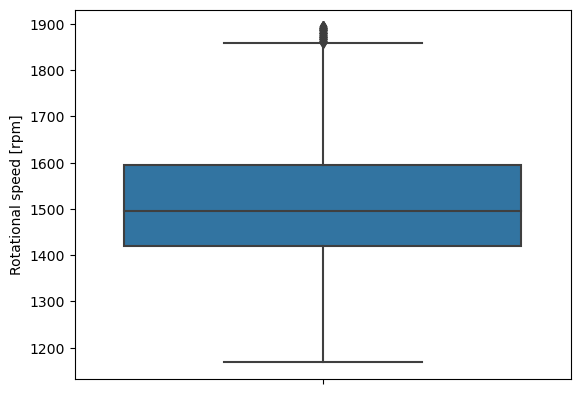

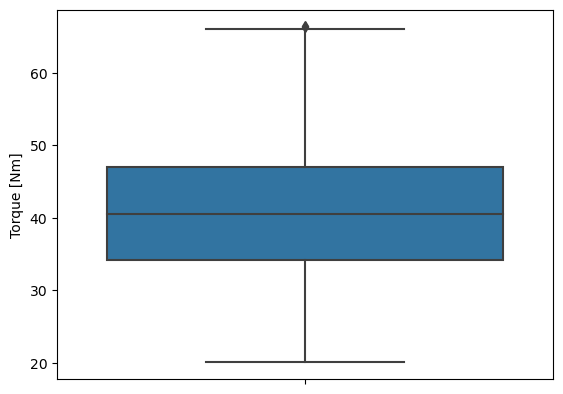

In [17]:
for i in col:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    df=df[(df[i]>ll) & (df[i]<ul)]
    plt.figure()
    sns.boxplot(data=df,y=i)

In [18]:
df.shape

(9535, 10)

In [19]:
sc=StandardScaler()

In [20]:
df[num]=sc.fit_transform(df[num])

In [21]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,-1.729705,M14860,M,-0.948880,-0.945448,0.274814,0.228446,-1.699001,0,No Failure
1,-1.729359,L47181,L,-0.898767,-0.877932,-0.827242,0.621715,-1.651815,0,No Failure
2,-1.729013,L47182,L,-0.948880,-1.012964,-0.133640,0.970039,-1.620357,0,No Failure
3,-1.728668,L47183,L,-0.898767,-0.945448,-0.634575,-0.142350,-1.588900,0,No Failure
4,-1.728322,L47184,L,-0.898767,-0.877932,-0.827242,-0.086169,-1.557442,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,1.725370,M24855,M,-0.598086,-1.080480,0.683268,-1.265975,-1.478798,0,No Failure
9996,1.725715,H39410,H,-0.547973,-1.080480,0.899055,-1.007541,-1.431612,0,No Failure
9997,1.726061,M24857,M,-0.497860,-0.945448,0.999242,-0.827761,-1.352968,0,No Failure
9998,1.726407,H39412,H,-0.497860,-0.877932,-0.827242,0.868913,-1.305782,0,No Failure


In [22]:
df_new=pd.get_dummies(df,columns=cat,drop_first=True)

In [23]:
df_new

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Product ID_H29425,Product ID_H29432,Product ID_H29434,...,Product ID_M24855,Product ID_M24857,Product ID_M24859,Type_L,Type_M,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,-1.729705,-0.948880,-0.945448,0.274814,0.228446,-1.699001,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,-1.729359,-0.898767,-0.877932,-0.827242,0.621715,-1.651815,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,-1.729013,-0.948880,-1.012964,-0.133640,0.970039,-1.620357,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,-1.728668,-0.898767,-0.945448,-0.634575,-0.142350,-1.588900,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,-1.728322,-0.898767,-0.877932,-0.827242,-0.086169,-1.557442,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.725370,-0.598086,-1.080480,0.683268,-1.265975,-1.478798,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
9996,1.725715,-0.547973,-1.080480,0.899055,-1.007541,-1.431612,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9997,1.726061,-0.497860,-0.945448,0.999242,-0.827761,-1.352968,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
9998,1.726407,-0.497860,-0.877932,-0.827242,0.868913,-1.305782,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
x=df_new.drop('Target',axis=1)
y=df_new['Target']

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [32]:
models={
    'Logistic Regression':LogisticRegression(random_state=5),
    'Decision Tree':DecisionTreeClassifier(criterion='gini',random_state=10),
    'Random Forest':RandomForestClassifier(random_state=8)
}

Logistic Regression  :99.86%


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2783
           1       0.99      0.96      0.97        78

    accuracy                           1.00      2861
   macro avg       0.99      0.98      0.99      2861
weighted avg       1.00      1.00      1.00      2861



AxesSubplot(0.125,0.11;0.62x0.77)


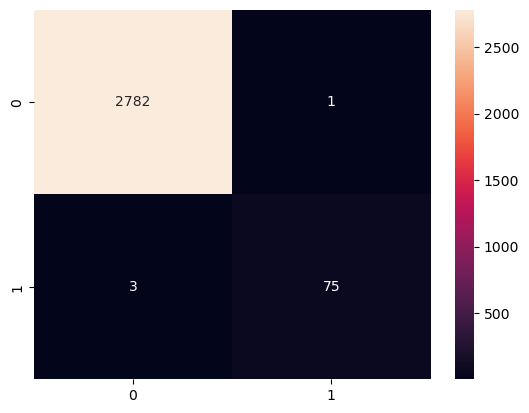

Decision Tree  :99.90%


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2783
           1       1.00      0.96      0.98        78

    accuracy                           1.00      2861
   macro avg       1.00      0.98      0.99      2861
weighted avg       1.00      1.00      1.00      2861



AxesSubplot(0.125,0.11;0.62x0.77)


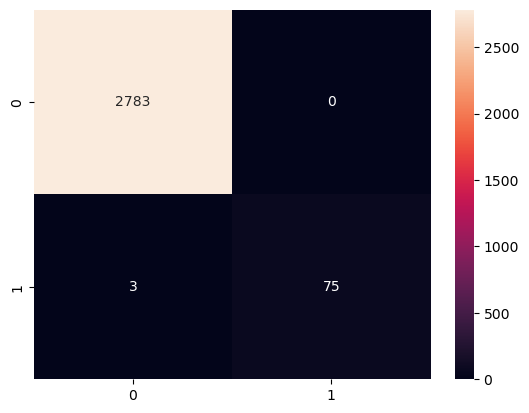

Random Forest  :99.90%


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2783
           1       1.00      0.96      0.98        78

    accuracy                           1.00      2861
   macro avg       1.00      0.98      0.99      2861
weighted avg       1.00      1.00      1.00      2861



AxesSubplot(0.125,0.11;0.62x0.77)


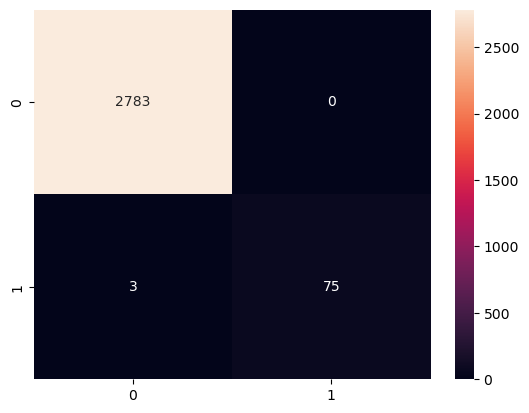

In [33]:
for name,model in models.items():
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(name,' :{:.2f}%'.format(accuracy_score(Y_test,Y_pred)*100))
    print('\n')
    print(classification_report(Y_test,Y_pred))
    print('\n')
    print(sns.heatmap(confusion_matrix(Y_test,Y_pred),fmt='g',annot=True))
    plt.show()

In [36]:
### Both Decision Tree and Random Forest is giving better accuracy model and in this case both of the model is prefered.

In [ ]:
# Here predicted False positive and Predicted False Negative value are very less as well as predicted True Positive and predicted True Negative value giving best results which is positive sign for predicting a model.